# Example 4.18

Use finite differences to solve the total head field for the seepage problem shown in the figure below.

## Data:

Geometry and soil properties from figure

## Principles:

$\cfrac{\partial^2 h}{\partial x^2}+\cfrac{\partial^2 h}{\partial y^2}=0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

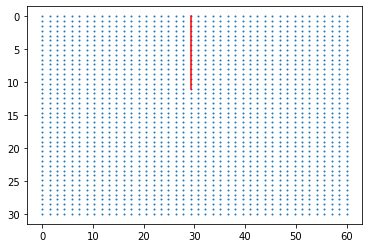

In [2]:
# Next, let's define the geometry of the problem

nx = 42 # Number of grid points in the x direction
ny = 42 # Number of grid points in the y direction
xmin = 0 # Minimum x value
xmax = 60 # Maximum x value
ymin = 0 # Minimum y value
ymax = 30 # Maximum y value
dx = (xmax - xmin) / (nx - 1) # Grid spacing in the x direction
dy = (ymax - ymin) / (ny - 1) # Grid spacing in the y direction
x = np.linspace(xmin, xmax, nx) # x values
y = np.linspace(ymin, ymax, ny) # y values

# Create the meshgrid from the x and y coordinates
X, Y = np.meshgrid(x, y)

#Create wall line
n_wall=int((nx-1)/2) #Node before the wall
number_nodes=16
y_wall=np.array([y[i] for i in range(number_nodes)])
x_wall=np.array([x[n_wall]]*number_nodes)

# Plot the meshgrid
plt.scatter(X, Y, s=1)
plt.plot(x_wall, y_wall, 'r')
plt.gca().invert_yaxis()
plt.show()


In [3]:
# Now, let's set up the boundary conditions:

h = np.zeros((ny, nx)) # Initialize the solution array
n_ups=int((nx/2)-1)


h[0,:n_ups+1] = 40 # Upstream total head in m
h[0,n_ups+1:] = 33 # Downstream total head in m

h[ny-1,:] = 0 # Boundary condition at y = ymax This will be iterated
h[:,0] = 40 # Boundary condition at x = xmin #will be iterated
h[:,nx-1] = 33 # Boundary condition at x = xmax #will be iterated

In [4]:
# Next, let's set up the finite difference method:


for it in range(10000):
    un = h.copy()
    h[1:-1,1:-1] = ((un[1:-1,2:] + un[1:-1,:-2]) * dy**2 +
                    (un[2:,1:-1] + un[:-2,1:-1]) * dx**2) / (2 * (dx**2 + dy**2))
    
    #Apply gradient BC
    h[:number_nodes+1,n_ups] = h[:number_nodes+1,n_ups-1] #left side
    h[:number_nodes+1,n_ups+1] = h[:number_nodes+1,n_ups+2] #right side

    #bottom
    h[ny-1, :]=h[ny-2, :]

    #left
    #h[1:-1,0]=h[1:-1,1]

    #right
    #h[1:-1,nx-1]=h[1:-1,nx-2]

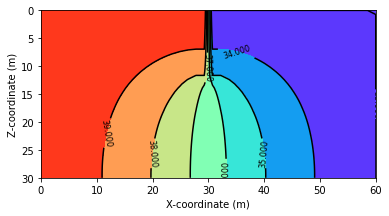

In [7]:
plt.contourf(X, Y, h, levels=6, cmap='rainbow')
contours = plt.contour(X, Y, h, levels=6, colors='k')
plt.clabel(contours, inline=True, fontsize=8)
plt.gca().invert_yaxis()
# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')
plt.xlabel(r'X-coordinate (m)')
plt.ylabel(r'Z-coordinate (m)')
plt.show()

In [15]:
# now lets compute the velocities
Grad_x=np.zeros((ny,nx))
Grad_y=np.zeros((ny,nx))
Grad_x[:,:-1]=-(h[:,1:]-h[:,:-1])/dx
Grad_y[:-1,:]=(h[1:,:]-h[:-1,:])/dy

Grad_x[:number_nodes+1,n_ups] = 0 #left side
Grad_x[:number_nodes+1,n_ups+1] = 0 #right side

#velocities
k=3.5e-5
vx=Grad_x*k #seepage velocity in the x direction
vy=-Grad_y*k #seepage velocity in the y direction

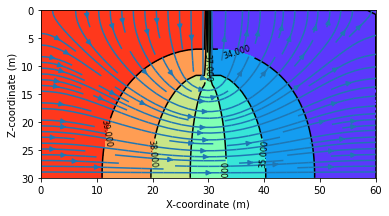

In [16]:
plt.contourf(X, Y, h, levels=6, cmap='rainbow')
contours = plt.contour(X, Y, h, levels=6, colors='k')
plt.clabel(contours, inline=True, fontsize=8)

#plt.quiver(X,Y,vx, vy, color='green')
plt.streamplot(X,Y,vx, vy)
plt.gca().invert_yaxis()
# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')
plt.xlabel(r'X-coordinate (m)')
plt.ylabel(r'Z-coordinate (m)')
plt.savefig('seepage.svg')
plt.show()